In [ ]:
# install machine gnostics

# recommended to run in a new virtual environment

# !pip install machinegnostics

# Gnostics Data Homogeneity Test

Analyze data homogeneity for EGDF objects using probability density function analysis.

This class provides comprehensive homogeneity analysis for Estimating Global Distribution Functions (EGDF) by examining the shape and characteristics of their probability density functions (PDF). The homogeneity criterion is based on the mathematical properties and expected PDF behavior of EGDF according to gnostic theory principles.

Gnostic Theory Foundation:

The EGDF is uniquely determined by the data sample and finds the optimal scale parameter automatically. Unlike local distribution functions, EGDF has limited flexibility and provides a unique representation for each homogeneous data sample. The key principle is that homogeneous data should produce a distribution with a single density maximum, while non-homogeneous data will exhibit multiple maxima or negative density values.

## Example Data

In [2]:
# lets take a small data set example with one outlier
import numpy as np

data = np.array([-3, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) # homogeneous data with an outlier

data = np.array([-13.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) # non-homogeneous data

# print the data
print("Data: ", data)

Data:  [-13.5   1.    2.    3.    4.    5.    6.    7.    8.    9.   10. ]


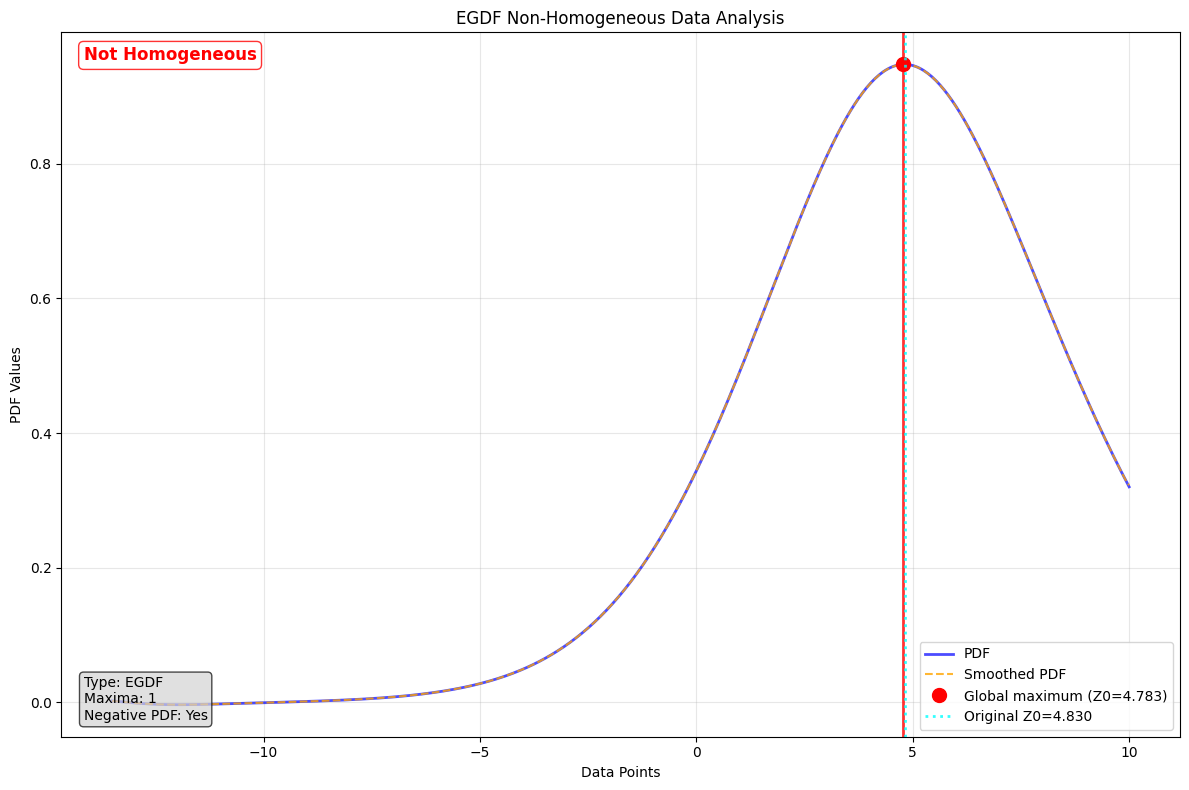

Is the data homogeneous?  False


{'has_negative_pdf': np.True_,
 'num_maxima': 1,
 'extrema_type': 'maxima',
 'gdf_type': 'egdf',
 'is_homogeneous': False,
 'picks': [{'index': 389,
   'position': 4.783000000000001,
   'pdf_value': 0.9479472209805143,
   'smoothed_pdf_value': 0.9478444431217321,
   'is_global': True}],
 'z0': np.float64(4.829999999999998),
 'global_extremum_idx': np.int64(389),
 'analysis_parameters': {'smoothing_sigma': 1.0,
  'min_height_ratio': 0.01,
  'min_distance': 25,
  'flush': True},
 'homogeneity_fitted': True,
 'gdf_parameters': {'data': array([-13.5,   1. ,   2. ,   3. ,   4. ,   5. ,   6. ,   7. ,   8. ,
           9. ,  10. ]),
  'DLB': -13.5,
  'DUB': 10.0,
  'LB': -18.801822182062907,
  'UB': 24.342306362479277,
  'S': 'auto',
  'z0_optimize': True,
  'varS': False,
  'tolerance': 1e-09,
  'data_form': 'a',
  'n_points': 500,
  'homogeneous': True,
  'catch': True,
  'weights': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
  'compute_wedf': False,
  'opt_method': 'Powell',
  've

In [3]:
# DataHomogeneity Test
from machinegnostics.magcal import DataHomogeneity, EGDF

# Step 1: get you GDF object, EGDF for homogeneity test
egdf = EGDF(verbose=False)

# fit the data
egdf.fit(data=data)

# Step 2: get you DataHomogeneity object
# create a DataHomogeneity object
dh = DataHomogeneity(gdf=egdf, verbose=False, flush=True)

# fit the data
is_homogeneous = dh.fit(plot=True)
print("Is the data homogeneous? ", is_homogeneous)

# check results
dh.results()

## Data Scedasticity Test

Gnostic Scedasticity Test for Homoscedasticity and Heteroscedasticity

This class provides a method to check for homoscedasticity and heteroscedasticity in data, inspired by fundamental principles rather than standard statistical tests. Unlike classical approaches, this implementation uses gnostic variance and gnostic linear regression, which are based on the Machine Gnostics framework.

Key Differences from Standard Methods:

Variance Calculation: The variance used here is the gnostic variance, which may differ in definition and properties from classical statistical variance. It is designed to capture uncertainty and spread in a way that aligns with gnostic principles.
Regression Model: The linear regression model employed is a gnostic linear regression, not the standard least squares regression. This model is tailored to the gnostic approach and may use different loss functions, optimization criteria, or regularization.
Test Philosophy: This is not a formal statistical test (such as Breusch-Pagan or White's test), but rather a diagnostic inspired by the fundamentals of the gnostic framework. The method splits residuals based on the median of the independent variable and compares the gnostic variances of the squared residuals in each half.

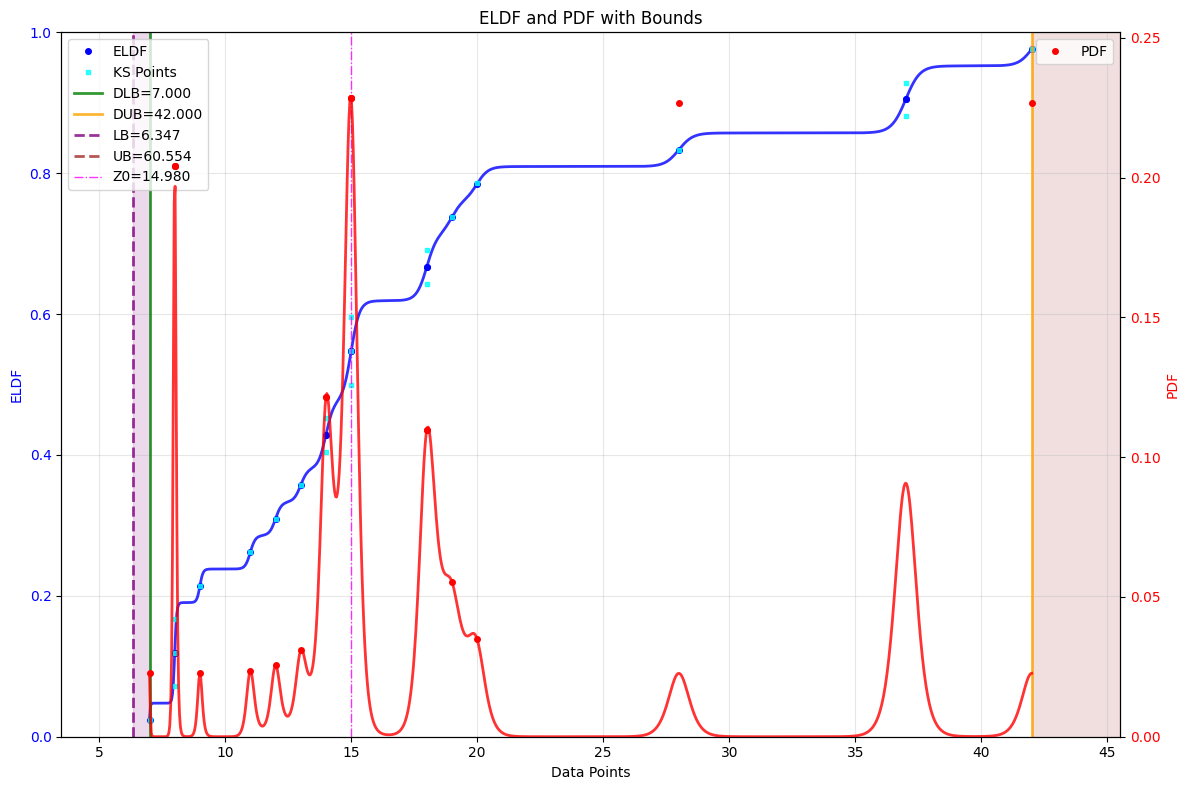

Is the data homoscedastic?  False


{'scedasticity': 'heteroscedastic',
 'scale_parameter': array([0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 ,
        0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.01, 0.01, 0.01, 0.01]),
 'S_local': np.float64(1.2548785448500057),
 'S_global': 2.5812929064365195}

In [5]:
# import
from machinegnostics.magcal import DataScedasticity

# Example data
y = np.array([ 7,  8,  8,  8,  9, 11, 12, 13, 14, 14, 15, 15, 15, 18, 18, 19, 20, 28, 37, 37, 42])

# Step 1: get you ELDF object
from machinegnostics.magcal import ELDF

eldf = ELDF(varS=True, verbose=False)
eldf.fit(data=y, plot=True)

# Step 2: create a DataScedasticity object
ds = DataScedasticity(gdf=eldf, verbose=False)

# fit the data
is_homoscedastic = ds.fit()
print("Is the data homoscedastic? ", is_homoscedastic)
# check results
ds.results()

## Data Membership Test

DataMembership

This class provides functionality to test whether a given value can be considered a member of a homogeneous data sample. It uses the EGDF (Empirical Generalized Distribution Function) framework to determine the homogeneity of the data sample and to calculate the bounds within which new data points can be added without disrupting the homogeneity.

In [ ]:
# import
from machinegnostics.magcal import DataMembership, EGDF

# Example data
data = np.array([-3, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# create a EGDF object
egdf = EGDF(verbose=False)
# fit the data
egdf.fit(data=data)

# create a DataMembership object
dm = DataMembership(egdf=egdf, verbose=False)
# fit the data
lsb, usb = dm.fit()

print(f"Lower and Upper Sample Bounds to check Data Membership: LSB: {lsb}, USB: {usb}")

Lower and Upper Sample Bounds to check Data Membership: LSB: -3.329550146023564, USB: 10.329550146023571
